<a href="https://colab.research.google.com/github/abhijithjayakumar6798/ML-projects/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
HeartData = pd.read_csv('heart.csv')

In [ ]:
HeartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
HeartData.shape

(1025, 14)

In [ ]:
HeartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
HeartData.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
HeartData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
HeartData['target'].value_counts()
#1 Represents Defective and 0 Represents Not Defective

,count
target,
1,526
0,499


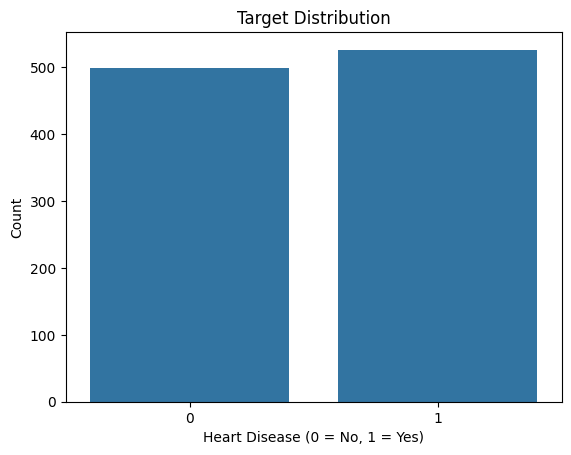

In [ ]:
# Visualize target distribution
sns.countplot(x='target', data=HeartData)
plt.title('Target Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

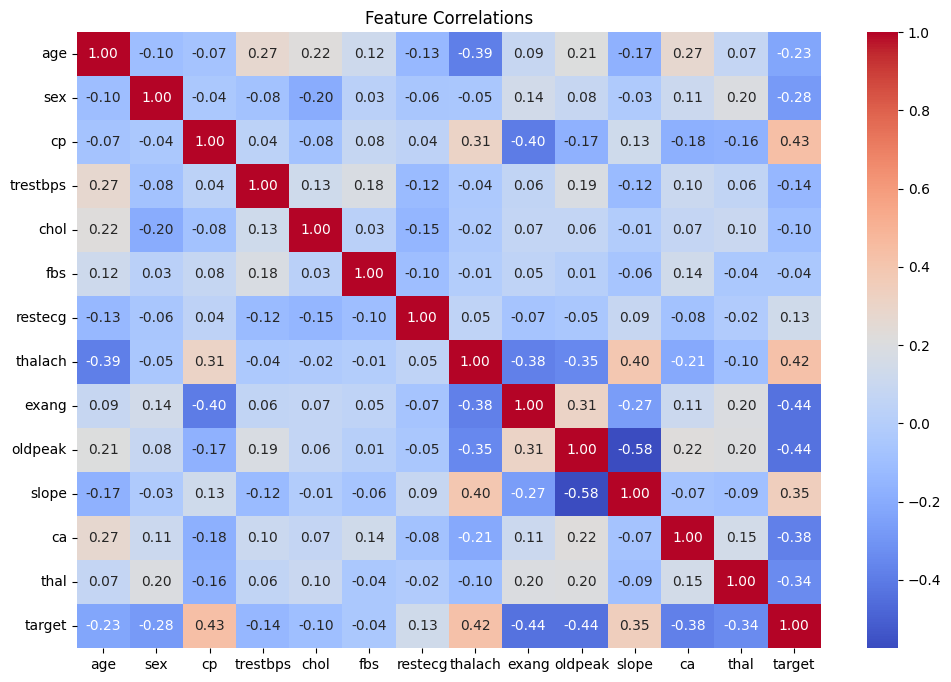

In [ ]:

correlation_matrix = HeartData.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlations')
plt.show()


In [ ]:
Y=HeartData['target']
X=HeartData.drop(columns='target',axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_scaled,Y, test_size=0.3, stratify=Y, random_state=5)

In [ ]:
model = LogisticRegression(max_iter = 1500)
model.fit(X_Train,Y_Train)


LogisticRegression(max_iter=1500)

In [ ]:
X_Train_Prediction = model.predict(X_Train)
Training_Data_Accuracy = accuracy_score(X_Train_Prediction,Y_Train)

In [ ]:
print ("Training Data Accuracy:",Training_Data_Accuracy*100)

Training Data Accuracy: 84.10041841004184


In [ ]:
X_Test_Accuracy = model.predict(X_Test)
Test_Data_Accuracy = accuracy_score(X_Test_Accuracy,Y_Test)

In [ ]:
print("Test Data Accuracy:", Test_Data_Accuracy*100)

Test Data Accuracy: 85.3896103896104


In [ ]:
cv_scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean()*100)

Cross-Validation Accuracy Scores: [0.87378641 0.90291262 0.87378641 0.83495146 0.84466019 0.89215686
 0.80392157 0.83333333 0.78431373 0.80392157]
Mean CV Accuracy: 84.4774414620217


In [ ]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
input_data_as_array= np.asarray(input_data)
input_data_reshape= input_data_as_array.reshape(1,-1)
input_data = scaler.transform(input_data_reshape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
prediction = model.predict(input_data)
print (prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
if (prediction[0]== 0):
  print("The Person does not have Heart Disease")
else :
  print ("The Person has a possibility of Heart Disease")


The Person has a possibility of Heart Disease


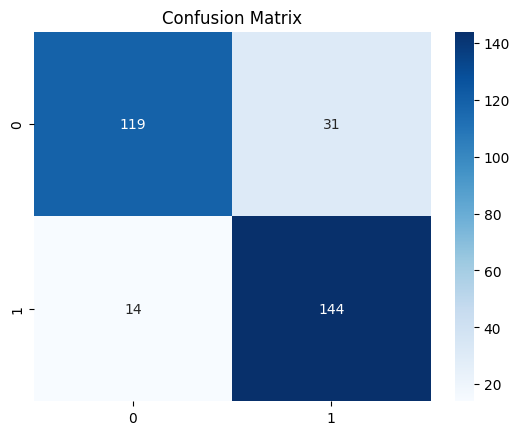


_________________CLASSIFICATION REPORT_________________ 

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       150
           1       0.82      0.91      0.86       158

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308



In [ ]:

conf_matrix = confusion_matrix(Y_Test, X_Test_Accuracy)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("\n_________________CLASSIFICATION REPORT_________________ \n")
print(classification_report(Y_Test, X_Test_Accuracy))
